# Mise en place

In [1]:
import sympy as sp
sp.init_printing()
from IPython.display import display
import warnings
warnings.filterwarnings("ignore", module="IPython")

# Objectif

$$
\begin{cases}
\max u^\pm(q_0, q_1, q_2)=:a q_{1} + a q_{2} - \frac{(b+d) q_{1}^{2}}{2} - \frac{(b+d) q_{2}^{2}}{2} \pm d q_{1} q_{2} + q_{0}
\\
q_0\geq 0,\\
q_1\geq 0,\\
q_2\geq 0,\\
R - p_{1} q_{1} - p_{2} q_{2} - q_{0}
\geq 0,
\end{cases}
$$
Avec les paramètres vérifiant $a>0$, $b>0$, $d>0$, $p_1\geq 0$, $p_2\geq 0$ et $R\geq 0$.

# Création des symboles

In [2]:
a = sp.Symbol("a", real=True, positive=True)
display(a)
b = sp.Symbol("b", real=True, positive=True)
display(b)
d = sp.Symbol("d", real=True, positive=True)
display(d)

In [3]:
q0, q1, q2 = sp.symbols("q_0 q_1 q_2", real=True, nonnegative=True)
display(q0, q1, q2)

In [4]:
p1, p2, R = sp.symbols("p_1 p_2 R", real=True, nonnegative=True)
display(p1, p2, R)

# Création des expressions composées

In [5]:
up = a * q1 + a * q2 - ((b+d) * q1 ** 2 + 2 * d *q1 * q2 + (b+d) * q2 ** 2) / 2 + q0
display(up)
um = a * q1 + a * q2 - ((b+d) * q1 ** 2 - 2 * d *q1 * q2 + (b+d) * q2 ** 2) / 2 + q0
display(um)

In [6]:
c = R - q0 -p1 * q1 - p2 * q2
display(c)

# Existence d'une solution au programme

Pour étudier une maximisation on a deux possibilités:
1. prouver qu'on maximise une fonction continue sur un domaine compact.
2. montrer que la fonction est concave et lui trouver un point critique.

Pour la première méthode les théorèmes usuels assurent la continuité et le caractère fermé du domaine.
Et on voit en utilisant $p_1, p_2>0$ que l'on a 
$$
\begin{cases}
0\leq q_0\leq R,\\
0\leq q_1\leq \frac{R}{p_1},\\
0\leq q_2\leq \frac{R}{p_2}
\end{cases}
$$
Donc on maximise sur un compact le maximum existe.

Pour la deuxième méthode, la concavité revient à vérifier que la hessienne est positive (définie ou pas).

In [7]:
hessienne = sp.hessian(up, [q0, q1, q2])
display(hessienne)

⎡0    0       0   ⎤
⎢                 ⎥
⎢0  -b - d    -d  ⎥
⎢                 ⎥
⎣0    -d    -b - d⎦

In [8]:
hessienne.is_negative_definite

False

In [9]:
hessienne.is_negative_semidefinite

True

C'est ici qu'on voit le bienfait d'avoir encoder les coefficients de la forme quadratique de manière au premier abord un peu artificielle.

# Calcul des points critiques par multiplicateurs de Lagrange

## Création des objets

In [10]:
l0, l1, l2, l3 = sp.symbols(
    "\lambda_0 \lambda_1 \lambda_2 \lambda_3", 
    real=True, 
    nonnegative=True
)

In [11]:
display(l0, l1, l2, l3)

In [12]:
L = up + l0 * q0 + l1 * q1 + l2 * q2 + l3 * c
display(L)

In [13]:
gradient = [sp.diff(L, var) for var in (q0, q1, q2, l0, l1, l2, l3)]
display(gradient)

## Enumération des possibilités

In [14]:
from itertools import product
from copy import deepcopy

In [15]:
solutions = list()
possibilites = product(*[[True, False] for _ in range(4)])
for choix in possibilites:
    Lc = deepcopy(L)
    variables = [q0, q1, q2]
    for est_saturee, multiplicateur in zip(choix, (l0, l1, l2, l3)):
        if est_saturee:
            variables.append(multiplicateur)
        else:
            Lc = Lc.subs(multiplicateur, 0)
            
    gradient = [sp.diff(Lc, var) for var in variables]
    solution = sp.solve(gradient, *variables)
    if solution:
        solutions.append(solution)
        

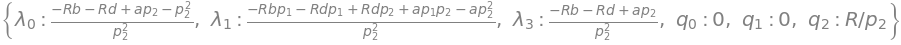

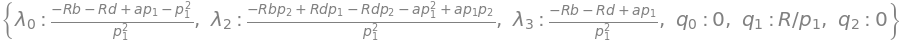

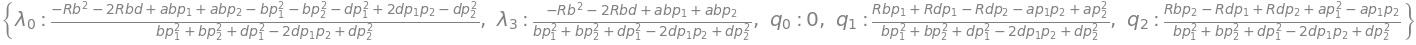

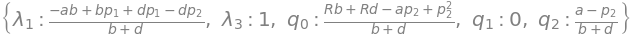

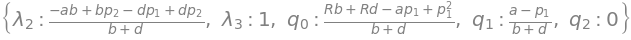

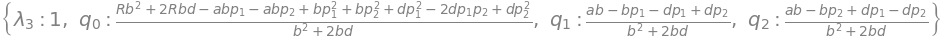

In [16]:
display(*solutions)

In [17]:
us = sp.Symbol("u^+", function=True)
display(us)

In [18]:
points_interessants = list()
for solution in solutions:
    points_interessants.append(
        {
            q0: solution[q0],
            q1: solution[q1],
            q2: solution[q2],
            us: up.subs(solution).simplify(),
        }
    )

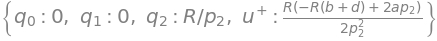

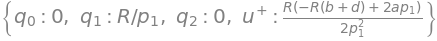

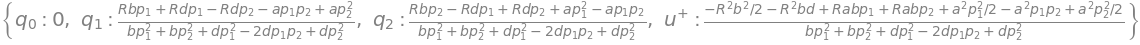

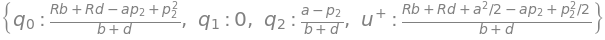

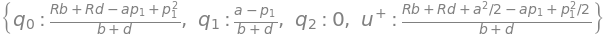

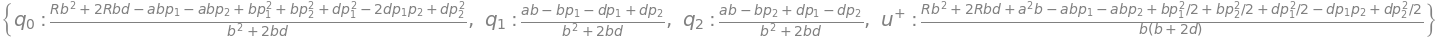

In [19]:
display(*points_interessants)

## Alternative

On introduit une variable de défaut $k$.

$$
\begin{cases}
\max u^\pm(q_0, q_1, q_2, k)=:a q_{1} + a q_{2} - \frac{(b+d) q_{1}^{2}}{2} - \frac{(b+d) q_{2}^{2}}{2} \pm d q_{1} q_{2} + q_{0}
\\
q_0\geq 0,\\
q_1\geq 0,\\
q_2\geq 0,\\
k\geq 0,\\
R - p_{1} q_{1} - p_{2} q_{2} - q_{0}=k
\end{cases}
$$
Avec les paramètres vérifiant $a>0$, $b>0$, $d>0$, $p_1\geq 0$, $p_2\geq 0$ et $R\geq 0$.

In [20]:
k = sp.Symbol("k", real=True, nonnegative=True)
display(k)

In [21]:
ck = R - p1 * q1 - p2 * q2 - q0 - k
display(ck)

In [22]:
l0, l1, l2, lk = sp.symbols("\lambda_0 \lambda_1 \lambda_2 \lambda_k ", real=True, nonnegative=True)
mu = sp.Symbol("\mu", real=True)
display((l0, l1, l2, lk, mu))

In [23]:
Lag = up + l0 * q0 + l1 * q1 + l2 * q2 + lk * k + mu * ck
display(Lag)

In [24]:
equations = [sp.Eq(Lag.diff(var), 0) for var in (q0, q1, q2, k, mu)]
equations.append(sp.Eq(l0 * q0, 0))
equations.append(sp.Eq(l1 * q1, 0))
equations.append(sp.Eq(l2 * q2, 0))
equations.append(sp.Eq(lk * k, 0))
display(*equations)

In [25]:
solutions = sp.solve(equations, [q0, q1, q2, k, mu, l0, l1, l2, lk], dict=True)

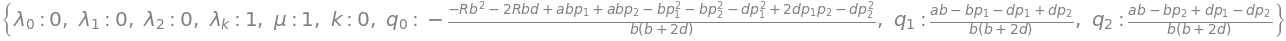

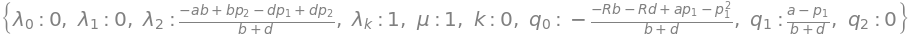

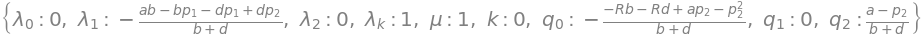

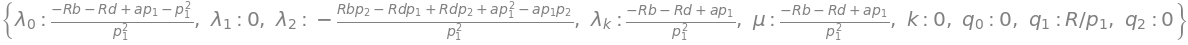

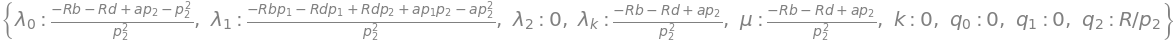

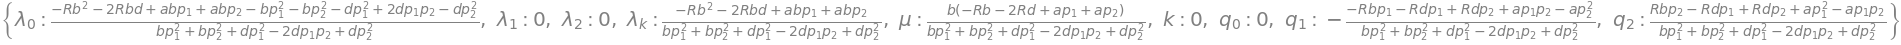

In [27]:
display(*solutions)